### 데이터 불러오기

In [1]:
#라이브러리 불러오기
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 불러오기
iris = datasets.load_iris()
features = iris.data

# 데이터프레임 생성
species = pd.DataFrame(iris.target)
species.columns = ['Species']
data = pd.DataFrame(iris.data)
data.columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width']
data = pd.concat([data, species],axis=1) 
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 데이터 탐색

In [2]:
# 변수간 상관관계 행렬 생성
data.corr()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
Sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
Sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
Petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
Petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


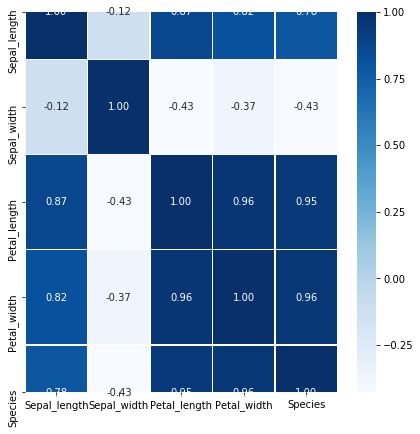

In [3]:
# 상관관계도 시각화(heatmap)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7,7))
sns.heatmap(data = data.corr(), annot=True, fmt = '.2f', linewidths=0.5, cmap='Blues')
# annot = 각 셀의 숫자(상관관계) 표시여부 , fmt = 숫자 표시 방식, '.2f' = 소수점 둘째 자리까지만. linewidths=각 셀의 간격 너비

### kNN모델 생성

※ knn 파라미터 설명

**weights** - 가중치 옵션. uniform(default)은 거리의 가까움 정도에 상관없이 동일한 가중치를 부여하나 weights = 'distance'로 설정시, 더 가까운 점일수록 가중치를 크게 부여한다.

**metric** - 거리(유사도) 계산 방식. minkowski(default), euclidean(일반 적인 두점 사이의 거리 공식(=2차 노름)), mahalanobis 1차원적인 좌표 차이의 절댓값(=1차 노름)

In [4]:
# kNN 분류기(Classifier) 생성
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = data.iloc[:,[2,3]] # Petal_length와 Petal_width만 사용하겠다.
y = iris.target

# 데이터 스케일링
X_std = scaler.fit_transform(X)

# kNN분류기 생성 ( k는 임의로 3으로 설정 )
knn = KNeighborsClassifier(n_neighbors=3,weights="uniform",metric="euclidean",n_jobs=-1).fit(X_std,y) 

In [5]:
# 새로운 관찰값 형성 및 예측

# 임의로 데이터를 생성한다.
new_observations = [[1, 0] , [4.0, 2.0] , [0,0]]

observe_pred = knn.predict(new_observations) # 예측값
# predict_proba? 각 클래스(0,1,2)에 해당할 것이라 예측한 확률값. 가장 높은 값을 선택한다.
print('예측값: ',observe_pred)
print('클래스별 예측 확률 : \n', knn.predict_proba(new_observations))

예측값:  [2 2 1]
클래스별 예측 확률 : 
 [[0.         0.33333333 0.66666667]
 [0.         0.         1.        ]
 [0.         1.         0.        ]]


### 모델의 정확도 측정을 통한 K값 선정

In [6]:
# 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X_std,y, test_size=0.4, shuffle=True, random_state=1000)

k_for_knn = range(1,15) # kNN에서의 이웃수(k)를 1에서 14까지 측정해 보겠다.
k_score = [] # 해당하는 이웃 파라미터수(k)의 정확도를 저장할 리스트.

for k in k_for_knn: 
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn,X_train,y_train,cv=3,scoring="accuracy") # cv=fold갯수 , scoring=성능 평가 방식(정확도)
    k_score.append(scores.mean()) # 3개 fold 정확도의 평균으로 k값의 성능 계산(append를 통해 점수를 리스트에 추가)

In [7]:
print(X_train.shape) # 몇 개의 Fold로 나눌지는 data(Training)사이즈를 보고 판단해야한다.

(90, 2)


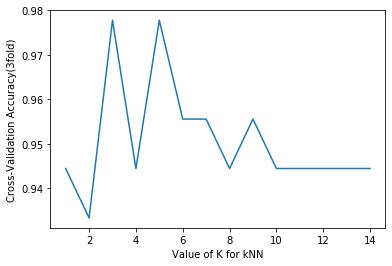

In [8]:
plt.plot(k_for_knn, k_score)
plt.xlabel('Value of K for kNN')
plt.ylabel('Cross-Validation Accuracy(3fold)')
plt.show()

### kNN활용(결측치 처리)

In [ ]:
pip list # KNNImputer는 0.22ver이상에서 작동하므로 자신의 버전을 확인해준다.

In [10]:
pip install -U scikit-learn # 최신 버전이 아니라면 이 코드로 업그레이드 해준다.

In [11]:
from sklearn.impute import KNNImputer 
import numpy as np #데이터분석 기초 라이브러리

Data = {
    'First':[100,80,np.nan,65],
    'Second':[20,55,76,np.nan],
    'Third':[np.nan,70,60,88]
}
Data = pd.DataFrame(Data)

imputer = KNNImputer(n_neighbors=3)

filled_Data = imputer.fit_transform(Data)
filled_Data = pd.DataFrame(filled_Data)

In [16]:
Data

,First,Second,Third
0,100.0,20.0,NaN
1,80.0,55.0,70.0
2,NaN,76.0,60.0
3,65.0,NaN,88.0


In [17]:
filled_Data # 결측치가 성공적으로 채워졌다.

,0,1,2
0,100.000000,20.000000,72.666667
1,80.000000,55.000000,70.000000
2,81.666667,76.000000,60.000000
3,65.000000,50.333333,88.000000
